## Logistic regression

Here we will consider two forms of logistic regression, 

In [135]:
# This can be deleted once the final notebook is created, just need it to import the data
import pandas as pd
dataset = pd.read_csv('../data/processed_data.csv')
dataset.head()
dataset.drop('Unnamed: 0', axis=1)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,0.515874,0.05,0.644231,1,4990,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,2,27003,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.841110,0.02,0.384615,3,4076,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.900277,0.11,0.432692,4,21622,1,2,2,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,5,34738,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8,8794,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
58588,1.199642,0.02,0.519231,14,7788,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58589,1.162273,0.05,0.451923,5,34738,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58590,1.236307,0.14,0.557692,8,8794,1,6,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [136]:
dataset = dataset[['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'model', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque_113Nm@4400rpm', 'torque_170Nm@4000rpm', 'torque_200Nm@1750rpm',
       'torque_200Nm@3000rpm', 'torque_250Nm@2750rpm', 'torque_60Nm@3500rpm',
       'torque_82.1Nm@3400rpm', 'torque_85Nm@3000rpm', 'torque_91Nm@4250rpm',
       'power_113.45bhp@4000rpm', 'power_118.36bhp@5500rpm',
       'power_40.36bhp@6000rpm', 'power_55.92bhp@5300rpm',
       'power_61.68bhp@6000rpm', 'power_67.06bhp@5500rpm',
       'power_88.50bhp@6000rpm', 'power_88.77bhp@4000rpm',
       'power_97.89bhp@3600rpm', 'fuel_type_CNG', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'rear_brakes_Disc', 'rear_brakes_Drum',
       'transmission_type_Automatic', 'transmission_type_Manual', 'segment_A',
       'segment_B1', 'segment_B2', 'segment_C1', 'segment_C2',
       'segment_Utility', 'steering_type_Electric', 'steering_type_Manual',
       'steering_type_Power', 'engine_type_1.0 SCe',
       'engine_type_1.2 L K Series Engine', 'engine_type_1.2 L K12N Dualjet',
       'engine_type_1.5 L U2 CRDi', 'engine_type_1.5 Turbocharged Revotorq',
       'engine_type_1.5 Turbocharged Revotron',
       'engine_type_F8D Petrol Engine', 'engine_type_G12B',
       'engine_type_K Series Dual jet', 'engine_type_K10C',
       'engine_type_i-DTEC']]
dataset.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'model', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque_113Nm@4400rpm', 'torque_170Nm@4000rpm', 'torque_200Nm@1750rpm',
       'torque_200Nm@3000rpm', 'torque_250Nm@2750rpm', 'torque_60Nm@3500rpm',
       'torque_82.1Nm@3400rpm', 'torque_85Nm@3000rpm', 'torque_91Nm@4250rpm',
       'power_113.45bhp@4000rpm', 'power_118.36bhp@5500rpm',
       'power

### Using all variables

In [137]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder


X = dataset.drop('is_claim', axis=1)
y = dataset['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the transformers
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

age_transformer = Pipeline(steps=[
    ('quartile', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
])

# create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['policy_tenure', 'population_density', 'is_adjustable_steering']),
        ('cat', cat_transformer, ['area_cluster']),
        ('age', age_transformer, ['age_of_car', 'age_of_policyholder'])
    ])

# build the logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], cv=10, penalty='l1', class_weight={0: 1, 1: 15} , solver='liblinear', max_iter=10000, random_state=42))
])

# train the model on the training set
model.fit(X_train, y_train)

# predict on the training set
y_train_pred = model.predict(X_test)

print('F1 Score:', f1_score(y_test, y_train_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_train_pred))
print("Precision:", precision_score(y_test, y_train_pred))
print("Recall:", recall_score(y_test, y_train_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_train_pred))
print(confusion_matrix(y_test, y_train_pred))

import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# assuming y_test and y_train_pred are already defined

results_all = {'Feature selection method': ['All'], 
        'F1 Score': [f1_score(y_test, y_train_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_train_pred)], 
        'Precision': [precision_score(y_test, y_train_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_train_pred)],
        'Recall': [recall_score(y_test, y_train_pred)]}

df = pd.DataFrame(results_all)

F1 Score: 0.14590347923681257
Accuracy: 0.5454390306340131
Precision: 0.08301404853128991
Recall: 0.6018518518518519
ROC-AUC score: 0.5717003489853075
[[5937 5026]
 [ 301  455]]


### Correlation analysis: 
You can use correlation analysis to identify columns that are highly correlated with the target variable (i.e., whether a claim is made or not). You can calculate the correlation coefficient between each column and the target variable and select the columns with the highest correlation coefficients.

In [138]:
corr = dataset.corr().abs()
corr_claim = corr['is_claim'].sort_values(ascending=False)
corr_claim = corr_claim[corr_claim > 0.01]
corr_cols = list(corr_claim.index)
print(f'The variables most correlated with claims (correlation > 0.005) are as follows: \n{corr_claim}')

The variables most correlated with claims (correlation > 0.005) are as follows: 
is_claim                            1.000000
policy_tenure                       0.078747
age_of_car                          0.028172
age_of_policyholder                 0.022435
population_density                  0.017808
is_adjustable_steering              0.013917
cylinder                            0.013434
segment_B2                          0.012714
power_88.50bhp@6000rpm              0.012381
torque_113Nm@4400rpm                0.012381
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
Name: is_claim, dtype: float64


In [139]:
dataset.is_esc.value_counts()

0    40191
1    18401
Name: is_esc, dtype: int64

In [140]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Select the independent variables with highest correlation to 'is_claim'
corr_matrix = dataset.corr()
highest_corr_vars = corr_matrix['is_claim'].nlargest(10).index
corr_matrix['is_claim'].head(10)

policy_tenure             0.078747
age_of_car               -0.028172
age_of_policyholder       0.022435
area_cluster             -0.003497
population_density       -0.017808
make                     -0.000456
model                     0.002642
airbags                   0.002789
is_esc                    0.002995
is_adjustable_steering    0.013917
Name: is_claim, dtype: float64

In [141]:
highest_corr_vars = corr_matrix['is_claim'].head(10).index
X = dataset.drop('is_claim', axis=1)[highest_corr_vars]
y = dataset['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the transformers
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

age_transformer = Pipeline(steps=[
    ('quartile', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
])

# create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['policy_tenure', 'is_adjustable_steering', 'population_density']),
        ('cat', cat_transformer, ['is_adjustable_steering', 'area_cluster', 'make', 'model', 'airbags', 'is_esc', 'is_adjustable_steering']),
        ('age', age_transformer, ['age_of_policyholder', 'age_of_car'])
    ])

# build the logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], cv=10, penalty='l1', class_weight={0: 1, 1: 15} , solver='liblinear', max_iter=10000, random_state=42))
])

# train the model on the training set
model.fit(X_train, y_train)

# predict on the training set
y_train_pred = model.predict(X_test)

print('F1 Score:', f1_score(y_test, y_train_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_train_pred))
print("Precision:", precision_score(y_test, y_train_pred))
print("Recall:", recall_score(y_test, y_train_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_train_pred))
print(confusion_matrix(y_test, y_train_pred))

data2 = {'Feature selection method': ['Correlation'], 
         'F1 Score': [f1_score(y_test, y_train_pred, pos_label=1)], 
         'Accuracy': [accuracy_score(y_test, y_train_pred)], 
         'Precision': [precision_score(y_test, y_train_pred)], 
         'Recall': [recall_score(y_test, y_train_pred)],
         'ROC-AUC score': [roc_auc_score(y_test, y_train_pred)]}

df2 = pd.DataFrame(data2)

df = df.append(df2, ignore_index=True)

F1 Score: 0.1476982097186701
Accuracy: 0.5450123730693746
Precision: 0.084
Recall: 0.6111111111111112
ROC-AUC score: 0.575782683166611
[[5925 5038]
 [ 294  462]]


/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_38315/11009930.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, make_scorer, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate

# Select the important features from the dataset
important_features = highest_corr_vars

# Split the dataset into training and testing sets, using only the important features
X_train, X_test, y_train, y_test = train_test_split(dataset[important_features], dataset['is_claim'], test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

# Fit the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

results = cross_validate(logreg, X_train, y_train, cv=5, scoring='f1')

print('F1 Score:', f1_score(y_test, y_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC score", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

F1 Score: 0.14426120273196735
Accuracy: 0.5616520180902808
Precision: 0.08252334667429007
Recall: 0.5727513227513228
ROC-AUC score: 0.5668189706888056
[[6149 4814]
 [ 323  433]]


### Feature selection algorithms: 
You can use feature selection algorithms like Recursive Feature Elimination (RFE), LASSO, or Ridge Regression to identify the most important columns. These algorithms use statistical techniques to identify the subset of columns that are most relevant for predicting the target variable.

Whether to use Ridge or Lasso regression depends on the type of feature selection you are looking for. Ridge regression is best suited when you have many variables that are all relevant to the outcome, and you want to reduce the impact of multicollinearity. On the other hand, Lasso regression is more suited when you have many variables but only a few are important for the outcome, and you want to select only those variables. So for this, we will use Lasso regression, as we have many features that might not be of importance.

Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique that penalizes the absolute size of the coefficients in a linear model. The penalty term encourages smaller magnitude coefficients and can set some of them to zero, effectively performing feature selection by eliminating irrelevant or redundant features.

In the case of logistic regression, Lasso can be used to select a subset of features that are most predictive of the outcome variable. The logistic regression model with Lasso regularization is also known as Lasso logistic regression. Lasso logistic regression can help prevent overfitting by reducing the number of features used in the model and improving the model's generalization performance.

In [143]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['is_claim'], axis=1), dataset['is_claim'], test_size=0.3, random_state=42)

# Create a Lasso regression model with alpha=0.1
lasso = Lasso(alpha=0.1)

# Fit the model on the training set
lasso.fit(X_train, y_train)

# Get the coefficients and corresponding column names
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Print the selected features
print("Selected features:")
print(coef[coef!=0])

Selected features:
population_density   -2.558731e-07
displacement          6.700019e-06
height               -1.271012e-06
gross_weight         -1.048795e-06
dtype: float64


In [144]:
X = dataset[coef[coef!=0].index]
y = dataset['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the transformers
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

age_transformer = Pipeline(steps=[
    ('quartile', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
])

# create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['population_density', 'displacement', 'height', 'gross_weight']),
    ])

# build the logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], cv=10, penalty='l1', class_weight={0: 1, 1: 15} , solver='liblinear', max_iter=10000, random_state=42))
])

# train the model on the training set
model.fit(X_train, y_train)

# predict on the training set
y_train_pred = model.predict(X_test)

print('F1 Score:', f1_score(y_test, y_train_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_train_pred))
print("Precision:", precision_score(y_test, y_train_pred))
print("Recall:", recall_score(y_test, y_train_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_train_pred))
print(confusion_matrix(y_test, y_train_pred))

data3 = {'Feature selection method': ['Lasso'], 
         'F1 Score': [f1_score(y_test, y_train_pred, pos_label=1)], 
         'Accuracy': [accuracy_score(y_test, y_train_pred)], 
         'Precision': [precision_score(y_test, y_train_pred)], 
         'Recall': [recall_score(y_test, y_train_pred)],
         'ROC-AUC score': [roc_auc_score(y_test, y_train_pred)]}

df3 = pd.DataFrame(data3)

df = df.append(df3, ignore_index=True)

F1 Score: 0.11925925925925926
Accuracy: 0.3912449867736155
Precision: 0.06576797385620915
Recall: 0.6388888888888888
ROC-AUC score: 0.5065282718639463
[[4102 6861]
 [ 273  483]]


/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_38315/402978744.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3, ignore_index=True)


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, make_scorer, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate

# Select the important features from the dataset
important_features = ['population_density', 'displacement', 'height', 'gross_weight']

# Split the dataset into training and testing sets, using only the important features
X_train, X_test, y_train, y_test = train_test_split(dataset[important_features], dataset['is_claim'], test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

# Fit the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

results = cross_validate(logreg, X_train, y_train, cv=5, scoring='roc_auc')

print('F1 Score:', f1_score(y_test, y_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC score", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

F1 Score: 0.12105130149102854
Accuracy: 0.4064339960747504
Precision: 0.06691813355685945
Recall: 0.6335978835978836
ROC-AUC score: 0.512183416851391
[[4284 6679]
 [ 277  479]]


### Principal Component Analysis (PCA): 
You can use PCA to reduce the dimensionality of the dataset and identify the most important columns. PCA transforms the original columns into a new set of uncorrelated variables (called principal components) that capture the maximum amount of variance in the dataset. You can then select the principal components with the highest variance as the most important columns.

In [146]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, roc_auc_score


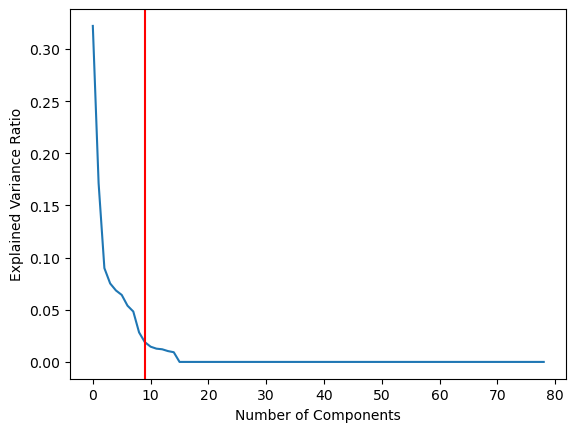

In [147]:
# Split data into features and target variable
X = dataset.drop('is_claim', axis=1)
y = dataset['is_claim']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal number of components using PCA
pca = PCA()
pca.fit(X_train_scaled)

# Determine optimal number of components based on elbow point
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.argmax(cumulative_variance_ratio > 0.90) + 1

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.axvline(optimal_num_components, color='r')
plt.show()

# Transform training and testing data using PCA
pca = PCA(n_components=optimal_num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [148]:
# Import Logistic Regression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression(class_weight={0: 1, 1: 15}, random_state=42, solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_pred = logreg.predict(X_test_pca)

print('F1 Score:', f1_score(y_test, y_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

data4 = {'Feature selection method': ['PCA'], 
         'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
         'Accuracy': [accuracy_score(y_test, y_pred)], 
         'Precision': [precision_score(y_test, y_pred)], 
         'Recall': [recall_score(y_test, y_pred)],
         'ROC-AUC score': [roc_auc_score(y_test, y_pred)]}

df4 = pd.DataFrame(data4)

df = df.append(df4, ignore_index=True)

F1 Score: 0.12341289994921281
Accuracy: 0.41087123474699205
Precision: 0.06825842696629214
Recall: 0.6428571428571429
ROC-AUC score: 0.5188654044122438
[[4329 6634]
 [ 270  486]]


/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_38315/3494034905.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4, ignore_index=True)


In [149]:
df

,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score:,Recall
0,All,0.145903,0.545439,0.083014,0.571700,0.601852
1,Correlation,0.147698,0.545012,0.084000,0.575783,0.611111
2,Lasso,0.119259,0.391245,0.065768,0.506528,0.638889
3,PCA,0.123413,0.410871,0.068258,0.518865,0.642857
